[8, 14, 3, 8, 9, 12, 19, 9, 8, 11, 14, 7, 12, 11, 15, 11, 8, 11, 16, 10, 14, 14, 14, 5, 7, 18, 11, 8, 16, 11, 8, 8, 15, 12, 7, 6, 4, 14, 12, 6, 8, 8, 14, 9, 17, 11, 11, 15, 10, 17, 14, 14, 9, 8, 6, 10, 12, 6, 15, 17, 11, 8, 9, 6, 7, 16, 7, 10, 9, 15, 8, 9, 15, 18, 12, 7, 9, 15, 6]
[ 9.13276398 12.3201204   5.92436309  9.64294558  9.64294558 12.56468897
 17.08011057  8.31488041  6.72120219 12.56468897 14.15836718  8.04926737
 13.36152807 11.23662379 13.89275414  9.64294558  8.58049344 11.23662379
 14.68959325  7.5180413  13.62714111 14.68959325 14.42398021  6.98681523
  6.72120219 17.3457236  11.23662379 10.43978469 15.75204539 10.97101076
  9.11171951  9.37733255 14.42398021 12.56468897  8.31488041  6.72120219
  3.53384577 14.15836718 12.56468897  8.58049344  7.5180413  10.43978469
 13.62714111  9.64294558 14.95520628 10.70539772 11.50223683 13.62714111
 12.0334629  15.22081932 13.09591504 14.15836718 10.97101076  9.64294558
  6.98681523 11.76784986 11.23662379  5.92436309 14.68959325 

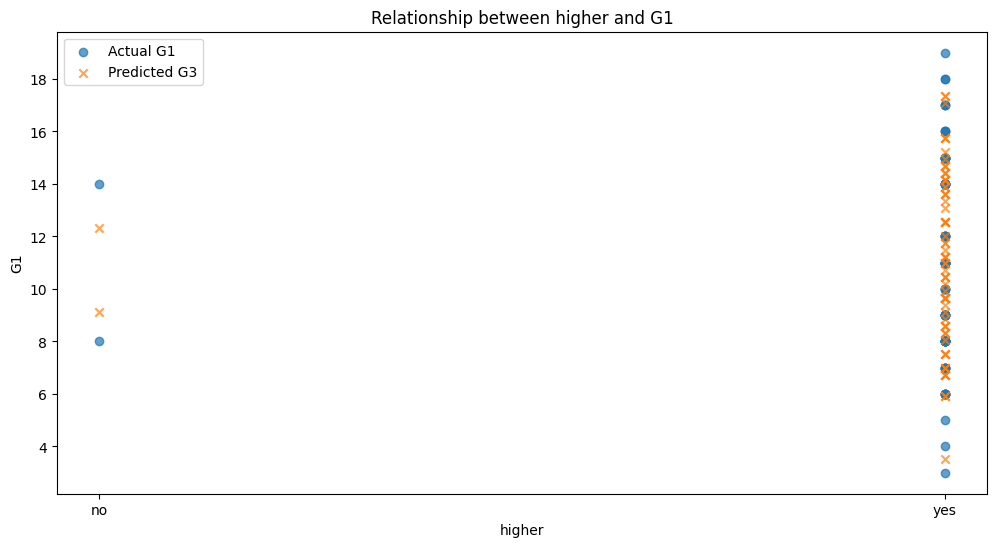

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('student-mat.csv')  # Replace 'your_dataset.csv' with the actual file path

# Select relevant columns for analysis
data = df[['higher', 'G1', 'G2', 'G3']]

# Calculate the mean of G1, G2, and G3 for each row using .loc
data = data.assign(mean_G=data[['G1', 'G2', 'G3']].mean(axis=1))

# One-hot encode 'higher'
data = pd.get_dummies(data, columns=['higher'], drop_first=True)

# Split the data into features (X) and target variable (y)
X = data[['mean_G', 'higher_yes']]
y = data['G1']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

print(y_test.values.tolist())
print(y_pred)

# Create a DataFrame with the original 'higher' and mean_G columns and predicted/actual G3 values
plot_data = pd.DataFrame({'higher': df.loc[X_test.index, 'higher'], 'Mean G': X_test['mean_G'], 'Actual G1': y_test.values, 'Predicted G1': y_pred})

# Plot the relationship between 'higher' and G3
plt.figure(figsize=(12, 6))
plt.scatter(plot_data['higher'], plot_data['Actual G1'], label='Actual G1', alpha=0.7)
plt.scatter(plot_data['higher'], plot_data['Predicted G1'], label='Predicted G3', marker='x', alpha=0.7)
plt.xlabel('higher')
plt.ylabel('G1')
plt.title('Relationship between higher and G1')
plt.legend()
plt.show()
